# Assignment 2
### Understanding Uncertainty
### Due 9/12

Sophie Kim

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [29]:
iowa = pd.read_csv("/Users/sophiekim/Desktop/msds/ds 5030/week 3/data/iowa.csv")

*I would define the most profitable item as the difference between the state bottle retail price and the state bottle cost. This would be because the net profit would be whatever money is leftover after the store paid the state bottle cost. I think the most profitable item would also depend on how many are sold since even if a bottle is pretty cheaply priced, Iowa could be selling a lot, which would make it more profitable than an expensive bottle that doesn't sell frequently.*

In [44]:
iowa["profitable_bottles"] = iowa["State Bottle Retail"] - iowa["State Bottle Cost"]

bottle_profit = (iowa.groupby("Item Description")["profitable_bottles"].sum())

profitable_df = iowa[iowa["Item Description"].isin(bottle_profit.index)]

profitable_df

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),profitable_bottles
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28,9.05
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12,2.42
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66,7.80
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72,3.94
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159899,INV-20689000058,07/17/2019,2565,HY-VEE FOOD STORE #1636 / SPENCER,51301,AMERICAN CORDIALS & LIQUEURS,LUXCO INC,76488,PARAMOUNT AMARETTO,1750,8.07,12.11,6,72.66,4.04
159900,S05071400061,04/16/2012,3583,MAC'S LIQUOR AND VIDEOS,50060,COFFEE LIQUEURS,PERNOD RICARD USA/AUSTIN NICHOLS,67527,KAHLUA COFFEE LIQUEUR,1000,14.81,22.22,1,22.22,7.41
159901,INV-22880300009,10/29/2019,3896,SMOKIN' JOE'S #18 TOBACCO AND LIQUOR OUTLET,52240,IMPORTED DRY GINS,DIAGEO AMERICAS,28866,TANQUERAY GIN,750,13.50,20.25,2,40.50,6.75
159902,INV-58180900067,05/05/2023,4057,TEQUILA'S LIQUOR STORE,50316,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,80363,OLE SMOKY BANANA PUDDING CREAM MOONSHINE,750,13.00,19.50,3,58.50,6.50


In [ ]:
# making smaller dataframe with relevant columns only
profit = (iowa.loc[:,['State Bottle Cost','State Bottle Retail', 'Item Description']]
         .groupby('Item Description')
         .sum())

profit

,State Bottle Cost,State Bottle Retail
Item Description,,
"""JOSE CUERVO SILVER """"ROLLING STONES""""""",21.00,31.50
"""RUMCHATA """"MINICHATAS"""" CREAMER CUPS""",77.00,115.50
10 CANE RUM,24.99,37.49
10TH MOUNTAIN CORDIAL,25.00,37.50
135� EAST HYOGO JAPANESE DRY GIN,33.34,50.02
...,...,...
ZING ZANG BLAZING BLOODY MARY RTS,66.48,99.76
ZING ZANG BLOODY MARY RTS,58.17,87.29
ZIYAD LEMON RUSH,8.00,12.00


In [ ]:
# making net profit column
profit['Net Profit'] = profit['State Bottle Retail'] - profit['State Bottle Cost']
profit


,State Bottle Cost,State Bottle Retail,Net Profit
Item Description,,,
"""JOSE CUERVO SILVER """"ROLLING STONES""""""",21.00,31.50,10.50
"""RUMCHATA """"MINICHATAS"""" CREAMER CUPS""",77.00,115.50,38.50
10 CANE RUM,24.99,37.49,12.50
10TH MOUNTAIN CORDIAL,25.00,37.50,12.50
135� EAST HYOGO JAPANESE DRY GIN,33.34,50.02,16.68
...,...,...,...
ZING ZANG BLAZING BLOODY MARY RTS,66.48,99.76,33.28
ZING ZANG BLOODY MARY RTS,58.17,87.29,29.12
ZIYAD LEMON RUSH,8.00,12.00,4.00


<Axes: xlabel='Net Profit', ylabel='Item Description'>

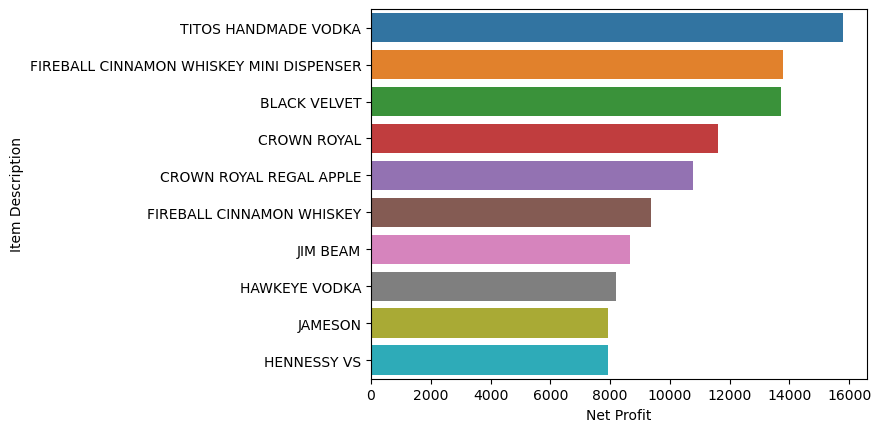

In [47]:
# getting top 10 bottles and making bar plot
profit = profit.sort_values(by='Net Profit', ascending=False)
top_bottles = profit[:10]
sns.barplot(data=top_bottles.reset_index(), y='Item Description', x='Net Profit', hue='Item Description', orient="h")

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [48]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [49]:
x.shape

(3,)

In [50]:
y.shape

(2,)

In [51]:
reshaping1 = x.reshape(-1,1)-y.reshape(1,-1)
reshaping1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [52]:
reshaping1.shape

(3, 2)

*The output for `x.reshape(-1,1)-y.reshape(1,-1)` is an array that returns [-1, -4], [1, -2], [3, 0] with shape of (3, 2).*

In [53]:
reshape2 = x.reshape(1,-1)-y.reshape(-1,1)
reshape2

array([[-1,  1,  3],
       [-4, -2,  0]])

In [54]:
reshape2.shape

(2, 3)

*The output for `x.reshape(1,-1)-y.reshape(-1,1)` is an array that returns [-1, 1, 3], [-4, -2, 0] with shape (2, 3).*

In [55]:
# x.reshape(-1,1)-y.reshape(1,-1)
L = np.zeros((len(x), len(y)))  # shape = (3,2)

for i in range(len(x)):        
    for j in range(len(y)):     
        L[i, j] = x[i] - y[j]

print(L)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


In [56]:
# x.reshape(1,-1)-y.reshape(-1,1)
L = np.zeros((len(y), len(x)))  # shape = (2, 3)

for i in range(len(y)):        
    for j in range(len(x)):     
        L[i, j] = x[j] - y[i]

print(L)

[[-1.  1.  3.]
 [-4. -2.  0.]]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

/var/folders/v1/c8q_17915_v735dr_k_2fb7w0000gn/T/ipykernel_49826/4118211285.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


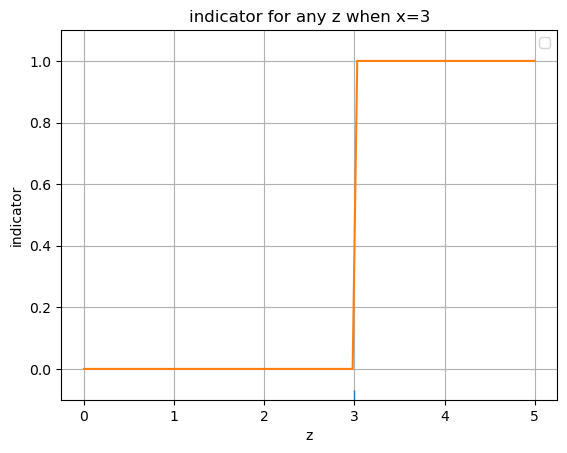

In [57]:
# for x = 3, plot the indicator function for any z

import matplotlib.pyplot as plt
import seaborn as sns

x = 3

# grid of z values i randomly decided to use 
grid = np.linspace(0,5, 100)



# define indicator function
def indicate(x_val, grid):
    return x_val <= grid

# plot a rugplot for the single data point
sns.rugplot([x])
plt.title(label='indicator for any z when x=3')

# compute and plot the indicator function
F = indicate(x, grid)
sns.lineplot(x=grid, y=F)


plt.xlabel('z')
plt.ylabel('indicator')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/v1/c8q_17915_v735dr_k_2fb7w0000gn/T/ipykernel_49826/376113563.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


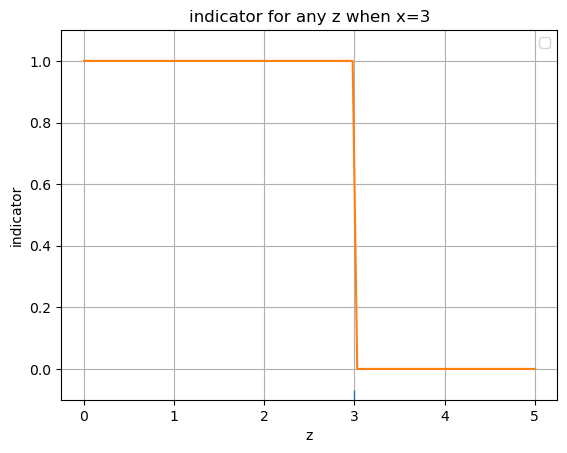

In [58]:
# doing indicator function for x > z
import matplotlib.pyplot as plt
import seaborn as sns

x = 3

# grid of z values i randomly decided to use 
grid = np.linspace(0,5, 100)



# indicator function
def indicate(x_val, grid):
    return x_val > grid # changing this part 


sns.rugplot([x])
plt.title(label='indicator for any z when x=3')


F = indicate(x, grid)
sns.lineplot(x=grid, y=F)


plt.xlabel('z')
plt.ylabel('indicator')
plt.legend()
plt.grid(True)
plt.show()

*$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ because they both are True at z = 3. This is because $ 1- \mathbb{I}\{ x \le z \}$ has the $1 -$ in front of it, so it flips the 0s to 1s and the 1s to 0s since the indicator value can only be either True (1) or False (0).*

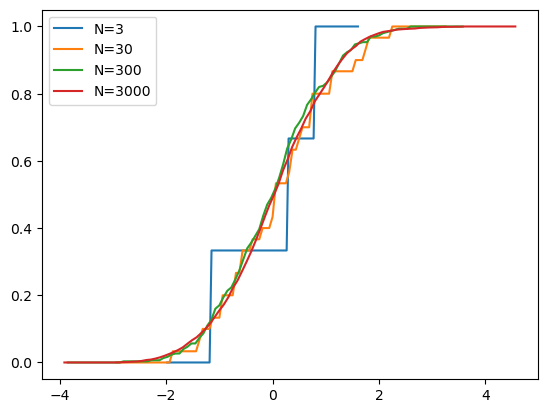

In [59]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def indicate(x,grid): 
    ''' Indicator function for computing ECDFs. '''
    return x <= grid

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:

    grid = np.linspace(X.min()-X.std(), X.max()+X.std(), 100) # Create a grid
    ecdf = 0*grid.copy() # Create a space for values

    for i in X:
        F_i = indicate(i,grid)
        ecdf += F_i

    ecdf = ecdf/len(X) # normalize
    sns.lineplot(x=grid, y=ecdf, label=f"N={N}")
    
plt.show()    


*The ECDF curves for each sample size shows that as the sample size increases, the smoother the curve becomes. There's less jagged-ness to the curve. This could mean that the smaller sample size ECDF are more closely following individual points (why it's jumping like that) and larger sample size ECDF aren't following individual data points that closely, so it's not jumping up in steps like a smaller sample size would.*

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

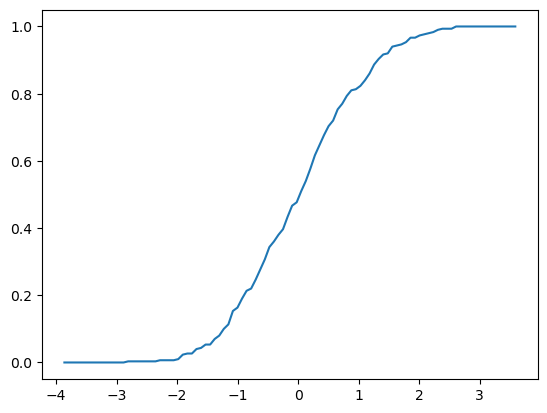

In [74]:
# using ecdf function to get f hat values to calculate q aka quantile for testing 


def indicate(x,grid): 
    ''' Indicator function for computing ECDFs. '''
    return x <= grid


    # ECDF plot goes here:

rng = np.random.default_rng(100)
x = rng.normal(0,1,300)
grid = np.linspace(x.min()-x.std(), x.max()+x.std(), 100) # Create a grid
ecdf = 0*grid.copy() # Create a space for values

for i in x:
        F_i = indicate(i,grid)
        ecdf += F_i

ecdf = ecdf/len(x) # normalize
sns.lineplot(x=grid, y=ecdf)




plt.show()

In [75]:
# getting f hat from ecdf
F_hat = ecdf
print(F_hat)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00333333 0.00333333 0.00333333 0.00333333
 0.00333333 0.00333333 0.00333333 0.00666667 0.00666667 0.00666667
 0.00666667 0.01       0.02333333 0.02666667 0.02666667 0.04
 0.04333333 0.05333333 0.05333333 0.07       0.08       0.1
 0.11333333 0.15333333 0.16333333 0.19       0.21333333 0.22
 0.24666667 0.27666667 0.30666667 0.34333333 0.36       0.38
 0.39666667 0.43333333 0.46666667 0.47666667 0.51       0.54
 0.57666667 0.61666667 0.64666667 0.67666667 0.70333333 0.72
 0.75333333 0.77       0.79333333 0.81       0.81333333 0.82333333
 0.84       0.86       0.88666667 0.90333333 0.91666667 0.92
 0.94       0.94333333 0.94666667 0.95333333 0.96666667 0.96666667
 0.97333333 0.97666667 0.98       0.98333333 0.99       0.99333333
 0.99333333 0.99333333 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.

In [76]:
# after getting f hat vaue from ecdf above, can use those numbers to compute quantile

def compute_quantile(F_hat, grid, quantile):
    idx = np.searchsorted(F_hat, quantile)
    if idx == 0:
        return grid[0]
    elif idx == len(F_hat):
        return grid[-1]
    x0, x1 = grid[idx - 1], grid[idx]
    y0, y1 = F_hat[idx - 1], F_hat[idx]
    # Linear interpolation for median:
    t = (quantile - y0) / (y1 - y0)
    return x0 + t * (x1 - x0)

# looking to see if it works
compute_quantile(F_hat, grid, 0.25)

np.float64(-0.6947300753459446)

In [77]:
# calculating interquartile range and the whiskers
def compute_IQR_and_whiskers(F_hat, grid):

    quantile_25 = compute_quantile(F_hat, grid, 0.25)
    quantile_75 = compute_quantile(F_hat, grid, 0.75)
    
  
    IQR = quantile_75 - quantile_25
    
   # note: whiskers are plus/minus 1.5 * IQR
    lower_whisker = quantile_25 - 1.5 * IQR
    upper_whisker = quantile_75 + 1.5 * IQR
    
    return quantile_25, quantile_75, IQR, lower_whisker, upper_whisker

# looking to see if it works
compute_IQR_and_whiskers(F_hat, grid)


(np.float64(-0.6947300753459446),
 np.float64(0.644062811549033),
 np.float64(1.3387928868949777),
 np.float64(-2.702919405688411),
 np.float64(2.6522521418914993))

In [78]:
def five_number_summary(F_hat, grid): 
    IQR_whiskers = compute_IQR_and_whiskers(F_hat, grid)
    median = compute_quantile(F_hat, grid, 0.5)
    return IQR_whiskers, median


five_number_summary(F_hat, grid)


((np.float64(-0.6947300753459446),
  np.float64(0.644062811549033),
  np.float64(1.3387928868949777),
  np.float64(-2.702919405688411),
  np.float64(2.6522521418914993)),
 np.float64(0.02693030028826244))

In [79]:
# outlier function
def outliers(F_hat, grid, x):
# using previous function
    quartile_25, quartile_75, IQR, lower_whisker, upper_whisker = compute_IQR_and_whiskers(F_hat, grid)
    
    outlier_points = (x < lower_whisker) | (x > upper_whisker)
    
    return outlier_points

outliers(F_hat, grid, x)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [80]:
iowa

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),profitable_bottles
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28,9.05
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12,2.42
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66,7.80
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72,3.94
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159899,INV-20689000058,07/17/2019,2565,HY-VEE FOOD STORE #1636 / SPENCER,51301,AMERICAN CORDIALS & LIQUEURS,LUXCO INC,76488,PARAMOUNT AMARETTO,1750,8.07,12.11,6,72.66,4.04
159900,S05071400061,04/16/2012,3583,MAC'S LIQUOR AND VIDEOS,50060,COFFEE LIQUEURS,PERNOD RICARD USA/AUSTIN NICHOLS,67527,KAHLUA COFFEE LIQUEUR,1000,14.81,22.22,1,22.22,7.41
159901,INV-22880300009,10/29/2019,3896,SMOKIN' JOE'S #18 TOBACCO AND LIQUOR OUTLET,52240,IMPORTED DRY GINS,DIAGEO AMERICAS,28866,TANQUERAY GIN,750,13.50,20.25,2,40.50,6.75
159902,INV-58180900067,05/05/2023,4057,TEQUILA'S LIQUOR STORE,50316,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,80363,OLE SMOKY BANANA PUDDING CREAM MOONSHINE,750,13.00,19.50,3,58.50,6.50


In [ ]:
# applying above functions with numeric variable from iowa dataset 

x = iowa['Bottle Volume (ml)']

# first getting f hat from ecdf

def indicate(x,grid): 
    ''' Indicator function for computing ECDFs. '''
    return x <= grid


    # ECDF plot goes here:


grid = np.linspace(x.min()-x.std(), x.max()+x.std(), 1000) # making it 1000 points since it is a lot of data 
ecdf = 0*grid.copy() # Create a space for values

for i in x:
        F_i = indicate(i,grid)
        ecdf += F_i

ecdf = ecdf/len(x) # normalize
F_hat = ecdf


In [91]:
# computing median

compute_quantile(F_hat, grid, 0.5)

np.float64(751.9055847720869)

In [92]:
# computing IQR and whiskers

compute_IQR_and_whiskers(F_hat, grid)

(np.float64(747.9767414997908),
 np.float64(997.1768219473632),
 np.float64(249.20008044757242),
 np.float64(374.1766208284322),
 np.float64(1370.9769426187218))

In [93]:
# computing 5 number summary

five_number_summary(F_hat, grid)

((np.float64(747.9767414997908),
  np.float64(997.1768219473632),
  np.float64(249.20008044757242),
  np.float64(374.1766208284322),
  np.float64(1370.9769426187218)),
 np.float64(751.9055847720869))

In [94]:
# computing boolean outliers

outliers(F_hat, grid, x)

0         False
1         False
2         False
3         False
4          True
          ...  
159899     True
159900    False
159901    False
159902    False
159903    False
Name: Bottle Volume (ml), Length: 159904, dtype: bool

In [95]:
x.describe()

count    159904.000000
mean        869.592737
std         513.812818
min          20.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: Bottle Volume (ml), dtype: float64

<Axes: xlabel='Bottle Volume (ml)'>

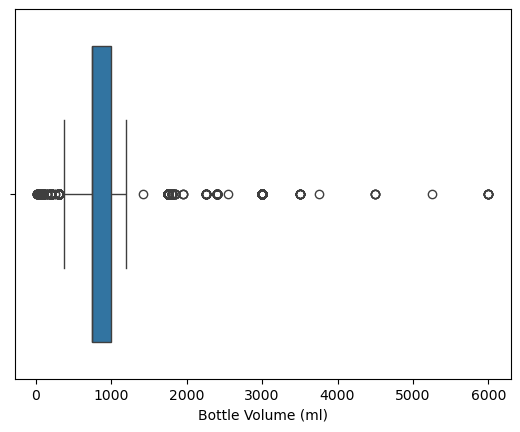

In [96]:
sns.boxplot(x, orient='h')

*According to both the describe and boxplots, it appears that the numbers from the functions were fairly similar. It looks like they were off by a little, but I think that probably had to do with the way the functions versus describe were caulcating their values under the hood. I think that changing around the amount of data points included in the ECDF would be able to either diverge from or become even more similar to the numbers calculated in describe.*

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?